In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

In [4]:
cricket = pd.read_csv('Cricket.csv',sep = ',',encoding = "ISO-8859-1",header=0)

In [5]:
cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null int64
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null int64
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


In [6]:
RFM_norm1 = cricket[['SR','Ave']]

In [7]:
RFM_norm1.head()

,SR,Ave
0,86.23,44.83
1,78.86,41.98
2,80.39,42.03
3,91.20,32.36
4,78.96,33.37


In [8]:
# standardise all parameters
#RFM_norm1 = cricket['SR','Ave']

standard_scaler = StandardScaler()
standard_scaler.fit_transform(RFM_norm1)

array([[ 0.70315153,  1.07229395],
       [-0.0441395 ,  0.58772461],
       [ 0.1109969 ,  0.59622582],
       [ 1.20709133, -1.04790945],
       [-0.03399986, -0.87618487],
       [-0.51259058,  0.16946476],
       [-0.64947564,  0.99238251],
       [-0.56734461,  0.42450125],
       [-0.8167796 ,  0.108256  ],
       [ 0.02176813,  0.33268811],
       [ 0.70315153,  0.12695867],
       [-0.42538973,  0.54181804],
       [ 1.78910632, -0.44772356],
       [ 0.95258652,  2.17575185],
       [-0.53489778, -0.2725985 ],
       [ 2.1247282 ,  2.5549061 ],
       [ 0.1860302 , -0.61604765],
       [ 0.58958763, -0.20288853],
       [ 0.13938788,  0.11675721],
       [-0.86747777,  0.52311536],
       [ 0.84916225, -0.3355075 ],
       [-1.64315977,  0.48400977],
       [-1.17369472, -0.16208269],
       [-0.24287632,  0.14056062],
       [ 2.53842527, -0.590544  ],
       [ 1.1857981 ,  2.62121559],
       [ 0.4020044 , -0.40691772],
       [ 3.82311689, -2.5424233 ],
       [-0.79143052,

In [9]:
# Kmeans with K=5
model_clus4 = KMeans(n_clusters = 4, random_state=100)
model_clus4.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [10]:
model_clus4.labels_

array([2, 1, 1, 3, 1, 1, 0, 0, 0, 1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 0, 2, 0,
       0, 1, 3, 2, 1, 3, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 0, 1, 1, 3, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1], dtype=int32)

In [11]:
RFM_km = pd.concat([cricket.Player, RFM_norm1, pd.Series(model_clus4.labels_)], axis=1)

In [12]:
RFM_km.head()

,Player,SR,Ave,0
0,SR Tendulkar (INDIA),86.23,44.83,2
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,1
2,RT Ponting (AUS/ICC),80.39,42.03,1
3,ST Jayasuriya (Asia/SL),91.20,32.36,3
4,DPMD Jayawardene (Asia/SL),78.96,33.37,1


In [13]:
RFM_km.columns = ['Player', 'SrikeRate','Avg', 'ClusterID']

In [14]:
RFM_km.to_csv('myCluster1.csv')

In [15]:
RFM_km[RFM_km.ClusterID == 0]

,Player,SrikeRate,Avg,ClusterID
6,JH Kallis (Afr/ICC/SA),72.89,44.36,0
7,SC Ganguly (Asia/INDIA),73.70,41.02,0
8,R Dravid (Asia/ICC/INDIA),71.24,39.16,0
19,S Chanderpaul (WI),70.74,41.60,0
21,DL Haynes (WI),63.09,41.37,0
22,MS Atapattu (SL),67.72,37.57,0
28,SP Fleming (ICC/NZ),71.49,32.40,0
32,Javed Miandad (PAK),67.01,41.70,0
36,NJ Astle (NZ),72.64,34.92,0
38,MG Bevan (AUS),74.16,53.58,0


In [16]:
RFM_km[RFM_km.ClusterID == 1]

,Player,SrikeRate,Avg,ClusterID
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,1
2,RT Ponting (AUS/ICC),80.39,42.03,1
4,DPMD Jayawardene (Asia/SL),78.96,33.37,1
5,Inzamam-ul-Haq (Asia/PAK),74.24,39.52,1
9,BC Lara (ICC/WI),79.51,40.48,1
11,Mohammad Yousuf (Asia/PAK),75.10,41.71,1
14,M Azharuddin (INDIA),74.02,36.92,1
16,PA de Silva (SL),81.13,34.90,1
17,CH Gayle (ICC/WI),85.11,37.33,1
18,Saeed Anwar (PAK),80.67,39.21,1


In [17]:
RFM_km[RFM_km.ClusterID == 2]

,Player,SrikeRate,Avg,ClusterID
0,SR Tendulkar (INDIA),86.23,44.83,2
10,TM Dilshan (SL),86.23,39.27,2
13,MS Dhoni (Asia/INDIA),88.69,51.32,2
15,AB de Villiers (Afr/SA),100.25,53.55,2
20,Yuvraj Singh (Asia/INDIA),87.67,36.55,2
25,V Kohli (INDIA),90.99,53.94,2
34,HM Amla (SA),89.05,50.25,2
42,IVA Richards (WI),90.20,47.00,2
46,LRPL Taylor (NZ),82.03,44.12,2
57,EJG Morgan (ENG/IRE),88.62,38.73,2


In [18]:
RFM_km[RFM_km.ClusterID == 3]

,Player,SrikeRate,Avg,ClusterID
3,ST Jayasuriya (Asia/SL),91.20,32.36,3
12,AC Gilchrist (AUS/ICC),96.94,35.89,3
24,V Sehwag (Asia/ICC/INDIA),104.33,35.05,3
27,Shahid Afridi (Asia/ICC/PAK),117.00,23.57,3
50,BB McCullum (NZ),96.37,30.41,3
61,SK Raina (INDIA),93.76,35.46,3


In [19]:
km_clusters_avg_SR= pd.DataFrame(RFM_km.groupby(["ClusterID"]).SrikeRate.mean())
km_clusters_AVG = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Avg.mean())

In [20]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_avg_SR, km_clusters_AVG], axis=1)
df.columns = ["ClusterID", "SR_mean", "AVG_mean"]
df.head()

,ClusterID,SR_mean,AVG_mean
0,0,68.894545,38.445909
1,1,78.043143,36.895714
2,2,88.596250,44.590000
3,3,99.933333,32.123333


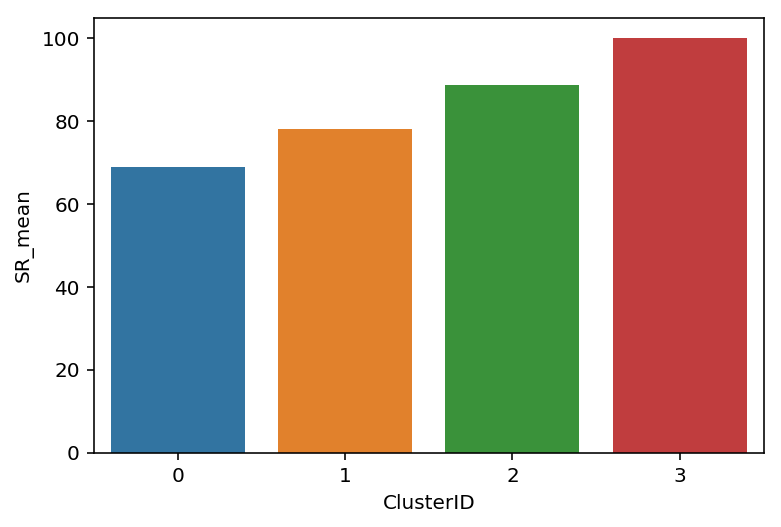

In [21]:
sns.barplot(x=df.ClusterID, y=df.SR_mean)

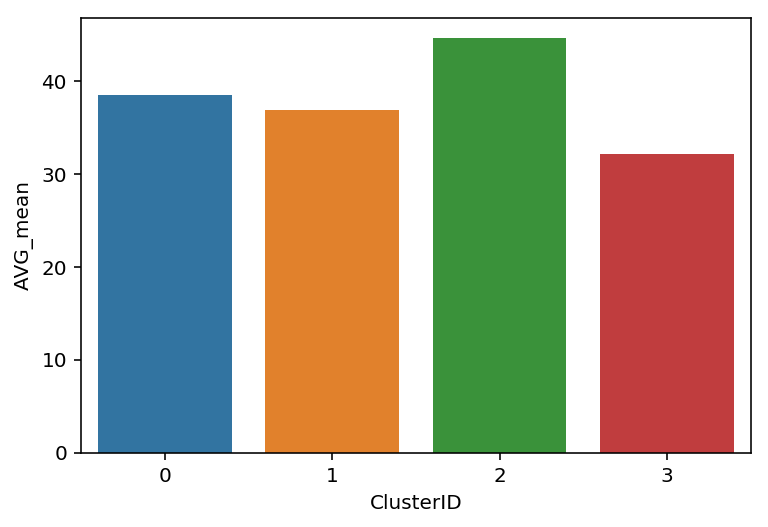

In [22]:
sns.barplot(x=df.ClusterID, y=df.AVG_mean)

In [1]:
from scipy.cluster.hierarchy import linkage

In [25]:
from scipy.cluster.hierarchy import dendrogram

In [41]:
from scipy.cluster.hierarchy import cut_tree

AttributeError: 'dict' object has no attribute 'T'

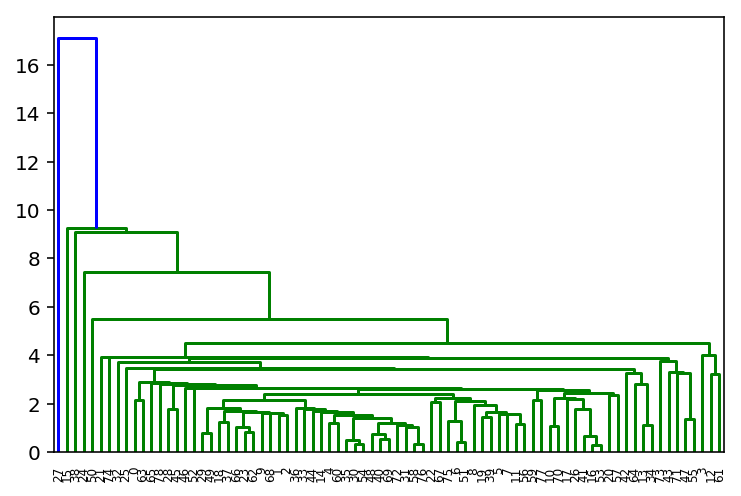

In [32]:
#Hierarachical
merging = linkage(RFM_norm1, method="single", metric = 'euclidean')
dendrogram(merging).T
plt.show()

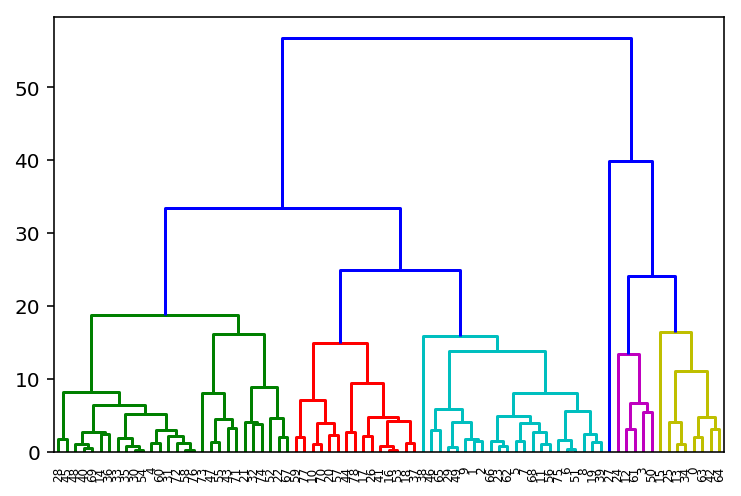

In [39]:
### Hierarachical
merging = linkage(RFM_norm1, method="complete", metric = 'euclidean')
dendrogram(merging,color_threshold = 20)
#dendrogram(merging)
plt.show()

In [43]:
RFM_km1 = pd.concat([cricket.Player, RFM_norm1, pd.Series(cut_tree(merging), n_clusters=4).reshape(-1,)], axis=1)

TypeError: __init__() got an unexpected keyword argument 'n_clusters'